In [2]:
# libs and dependancies
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import stats
import hvplot.pandas
import numpy as np

In [3]:
# Read CSV into DF
job_data = pd.read_csv("../Resources/jobs_in_data.csv")
job_data.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


# Question: Is there a correlation between highest salaries and Job Category?

# Find top 10% of salaries and it's job catagory

In [4]:
salary90 = job_data["salary_in_usd"].quantile(0.9)

In [5]:
high_salary_filter_s = job_data["salary_in_usd"] >= salary90
high_salary_df = job_data.loc[high_salary_filter_s, ['job_category', 'salary_in_usd']]
high_salary_df

,job_category,salary_in_usd
17,Data Science and Research,300000
18,Data Science and Research,234000
25,Machine Learning and AI,266500
29,Machine Learning and AI,273400
39,Data Engineering,247300
...,...,...
9287,Data Science and Research,416000
9304,Data Science and Research,325000
9336,Data Science and Research,235000
9348,Machine Learning and AI,423000


# Visualization Doughnut

In [6]:
high_salary_job_category_count_series = high_salary_df['job_category'].value_counts()
high_salary_job_category_count_series

job_category
Data Science and Research         381
Machine Learning and AI           280
Data Engineering                  189
Leadership and Management          38
Data Architecture and Modeling     23
Data Analysis                      12
BI and Visualization                8
Data Quality and Operations         3
Data Management and Strategy        2
Name: count, dtype: int64

In [7]:
high_sal_cat_vals = high_salary_job_category_count_series.values
high_sal_cat_index = high_salary_job_category_count_series.index

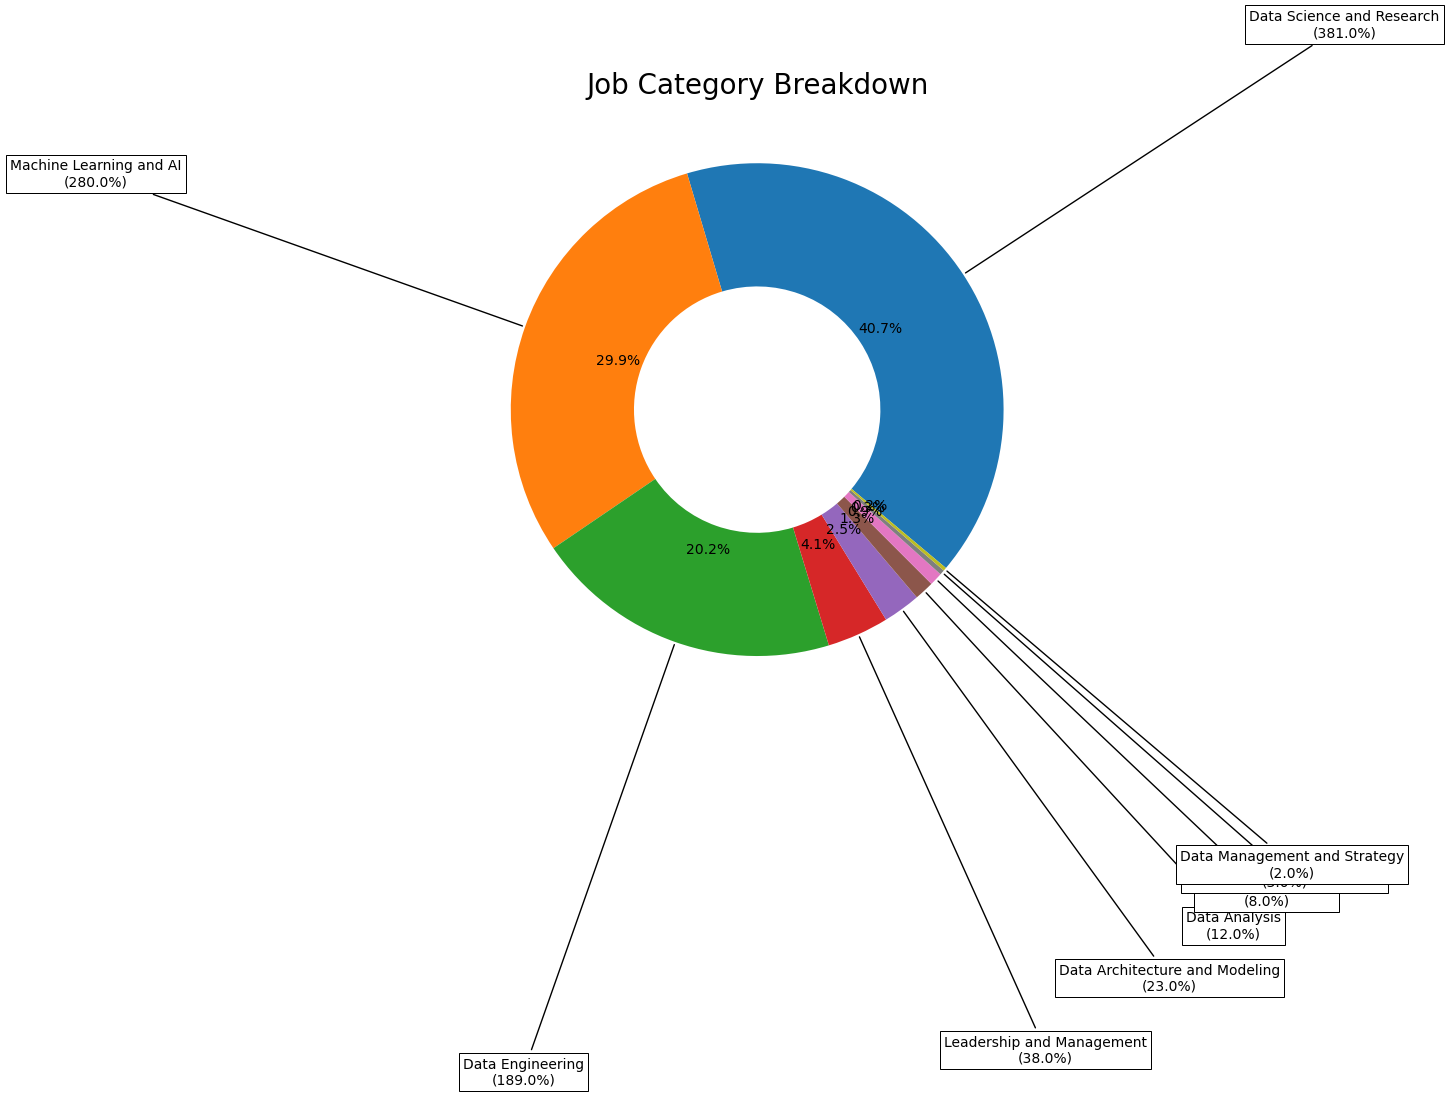

In [13]:
fig, ax = plt.subplots(figsize=(15, 8), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(high_sal_cat_vals, autopct='%1.1f%%', wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, (p, t, at) in enumerate(zip(wedges, texts, autotexts)):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    
    radius = 1.5 + 0.9 * 1.5
    x_text = radius * np.cos(np.deg2rad(ang))
    y_text = radius * np.sin(np.deg2rad(ang))
    
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    
    ax.annotate(f'{high_sal_cat_index[i]}\n({high_sal_cat_vals[i]:.1f}%)', xy=(x, y), xytext=(x_text, y_text),
                horizontalalignment=horizontalalignment, **kw, ha="center")
    
    t.set_text("")

ax.set_title("Job Category Breakdown", fontsize=20)
plt.savefig("../output/jp1.png", bbox_inches='tight', dpi=100, transparent=True)
plt.show()


# Visualization 2 Box Plot

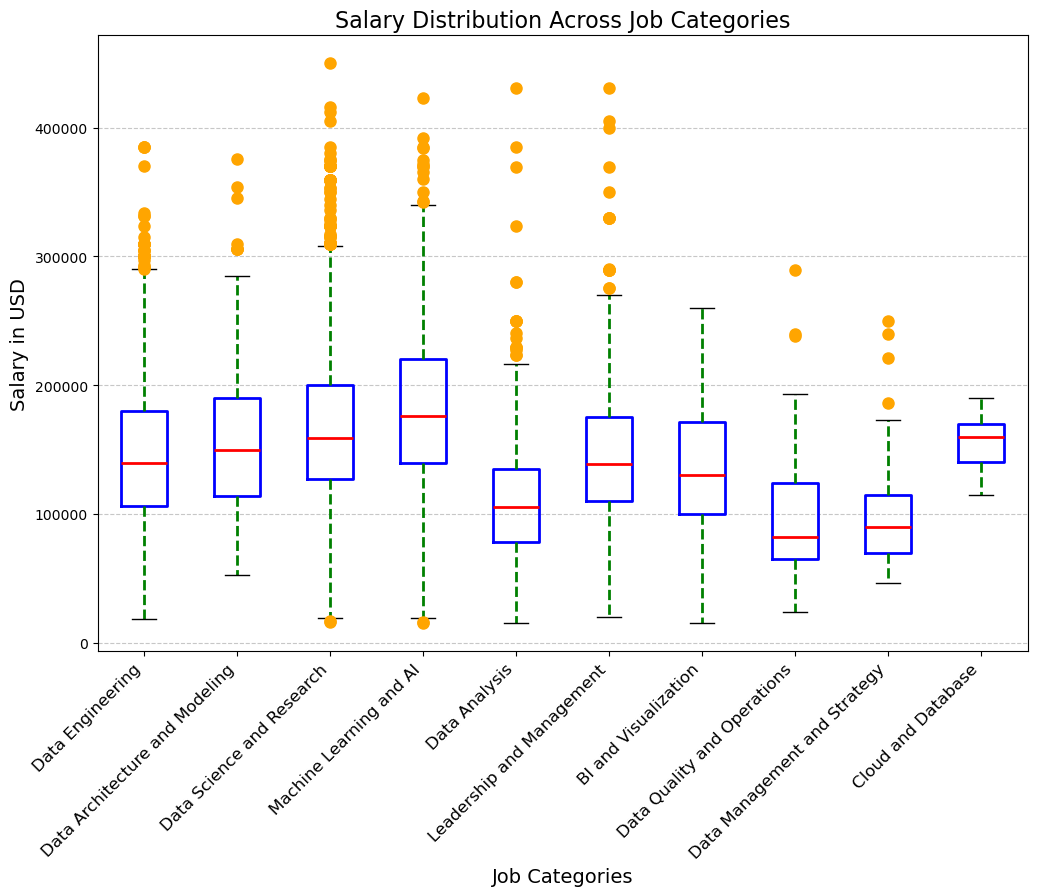

In [11]:
job_categories = job_data['job_category'].unique()
salaries_series = []

for category in job_categories:
    category_salaries = job_data.loc[job_data['job_category'] == category, 'salary_in_usd']
    
    # add salary series to the plotting list 
    salaries_series.append(category_salaries)    
    


fig, ax = plt.subplots(figsize=(12, 8))

boxprops = dict(linewidth=2, color='blue')
medianprops = dict(linewidth=2, color='red')
whiskerprops = dict(linewidth=2, linestyle='--', color='green')

# Customize the color of outliers
flierprops = dict(marker='o', markersize=8, markerfacecolor='orange', markeredgecolor='orange')

plt.boxplot(salaries_series, labels=job_categories, boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, flierprops=flierprops)

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Salary Distribution Across Job Categories', fontsize=16)
plt.xlabel('Job Categories', fontsize=14)
plt.ylabel('Salary in USD', fontsize=14)

plt.savefig("../output/jp2.png", bbox_inches='tight', dpi=100, transparent=True)
plt.show()

# stat test ANOVA

In [153]:
import warnings
warnings.filterwarnings('ignore')

In [156]:
group0 = job_data[job_data['job_category'] == job_categories[0]]['salary_in_usd']
group1 = job_data[job_data['job_category'] == job_categories[1]]['salary_in_usd']
group2 = job_data[job_data['job_category'] == job_categories[2]]['salary_in_usd']
group3 = job_data[job_data['job_category'] == job_categories[3]]['salary_in_usd']
group4 = job_data[job_data['job_category'] == job_categories[4]]['salary_in_usd']
group5 = job_data[job_data['job_category'] == job_categories[5]]['salary_in_usd']
group6 = job_data[job_data['job_category'] == job_categories[6]]['salary_in_usd']
group7 = job_data[job_data['job_category'] == job_categories[7]]['salary_in_usd']
group8 = job_data[job_data['job_category'] == job_categories[8]]['salary_in_usd']
group9 = job_data[job_data['job_category'] == job_categories[9]]['salary_in_usd']

In [157]:
stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9)

F_onewayResult(statistic=148.14691404434498, pvalue=9.32697394139812e-263)

# Conclusion

In [158]:
# With the current data, it is inconclusive to say job catagory corralates to high salaries